In [1]:
% matplotlib inline

# Analyzing Cancer Gene Expression Data Using Pandas

**Data Science Bootcamp**   
Created By: Shelley MacNeil   
July 10, 2016 

# Introduction to Pandas 
* Pandas is an open source Python library for data analysis, manipulation, and visualization
* Pandas is awesome!
* Similar to R programing 
* Makes data analysis in Python easier and faster
* If you're not using Pandas in Python, you're probably working too hard..


## We will use Pandas to...

1) Read in Datasets  
3) View and Slice Data  
4) Merge Datasets  
5) Parse and Save Data  
6) Visualize and Analyze Data
* Basic Statistics
* Plotting the data
    * Line Plots 
    * Boxplots
    * Histograms
    * Heatmaps
    * Correlations   
    
## The Dataset

* [``The Cancer Genome Atlas Project (TCGA)``](http://cancergenome.nih.gov/)
    * Large scale multi-omic cancer project for multiple cancers 
    * Made data publically available for researchers to analyze and better understand/treat cancer : [``Data Available Here``](https://gdc-portal.nci.nih.gov/)
    * Used to make numerous discoveries
![TCGA Infograph](./Resources/TCGA_overview.png)

### PANCAN12 Dataset
* Gene Expression Data (RNA-seq) from TCGA
    * 12 Different Cancer Types
    * 20,501 Genes 
    * 3271 Cancer Patients 
![TCGA Pie Chart](./Resources/TCGA_pie_plot.png)


### Importing Python Libraries Required for the Analysis

Libraries provide standardized solutions for many problems that occur in every day programming. Documentation is available at https://docs.python.org or you can use the help function. 

The following packages are needed:
 
* [``os``](https://docs.python.org/3/library/os.html?highlight=os#module-os): communicating with your operating system
* [``time``](https://docs.python.org/2/library/time.html): provides various time-related functions
* [``numpy``](http://www.numpy.org/): package for scientific computing in Python

### Graphing Modules

* [``matplotlib pyplot``](http://matplotlib.org/users/pyplot_tutorial.html): python 2D plotting library which produces publication quality figures in a variety of formats, and the most widely used graphing module
* [``pandas``](http://pandas.pydata.org/): package providing high-performance, easy-to-use data structures and data analysis tools in Python
* [``seaborn``](https://web.stanford.edu/~mwaskom/software/seaborn/): package for drawing attractive statistical graphics based on matplotlib 

DATADIR = file path to data

In [2]:
import os 
import time 
import numpy as np

DATADIR = os.path.join(os.path.expanduser("~"),
                       "DATA", "Bioinf")
print(os.path.exists(DATADIR))

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
DATADIR

True


'/home/jovyan/DATA/Bioinf'

## 1 . Reading Data into Python using Pandas 

One of the beauties of Pandas is the ease of data input/output that it provides  
Pandas can read compressed data and very large data quickly  

It has the capability to read:
* Tabular text data
    * [``read_csv``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html): read comma separated files
    * [``read_table``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html): read tab separated files
    * These are both wrappers to the same function with different default values
* Relational Databases
    * [``read_sql``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html)
* HDF5, a high performance file format for very large data
    * [``read_hdf``](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.read_hdf.html)
* Excel
    * [``read_excel``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html)

Pandas has the ability to read from a local disk or remote URL, with a wide variety of protocols  
   * [``read_html``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html): Read from HTML File
   * ftp: Read files from a server
   
   
### Recording Speed


Often times we want to see how fast operations are happening  
Use the **time** function to record how long it takes it read in the file

### Specify that We are Using the Pandas Library with .pd
Results in a Pandas Data Frame
Specify row names with **index_col** and column names with **header** functions 

In [3]:
geneexp_path = os.path.join(DATADIR,"PANCAN12.IlluminaHiSeq_RNASeqV2.geneExp.tumor_whitelist")
geneexpression_data = pd.read_table(geneexp_path, index_col=0, header=0)


## Reading in a Subset of the Data

### Specify what Columns and Row Numbers We Want to Read in 
* ``nrows``: number of rows to read
* ``usecols``: a range of column numbers or collection of names of columns to use

In [4]:
subdata = pd.read_table(geneexp_path,
            nrows=5,
            usecols=range(20,40))
subdata

,TCGA-05-4395,TCGA-05-4396,TCGA-05-4397,TCGA-05-4398,TCGA-05-4402,TCGA-05-4403,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4418,TCGA-05-4420,TCGA-05-4422,TCGA-05-4424,TCGA-05-4425,TCGA-05-4426,TCGA-05-4427,TCGA-05-4430,TCGA-05-4432,TCGA-05-4433
0,21.974501,17.437500,126.568703,258.073090,48.458900,64.167397,146.130096,79.403702,31.942200,85.305901,161.156601,404.333405,129.071503,257.969513,47.112499,307.764404,96.478302,403.980896,136.048492,27.966900
1,0.000000,15.921200,0.000000,0.217500,0.000000,1.946100,0.000000,0.000000,0.000000,0.000000,0.332400,0.000000,54.185699,0.000000,0.000000,0.000000,0.000000,0.000000,0.865300,8.264500
2,0.000000,0.000000,0.000000,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,54.007198,0.000000,0.000000,0.000000,0.000000,272.523804,0.296400,0.000000,0.319000,0.000000,0.000000
3,180.702896,133.578506,228.629501,148.960403,62.377701,173.850403,119.512199,161.781296,98.182198,144.065704,224.950607,48.606400,278.225311,53.112499,112.232803,121.988899,85.479301,98.704903,74.903397,136.454498
4,390.848389,0.758200,19.215900,1.304900,25.091999,0.000000,1.325300,6.880700,1.333300,3.176900,27.586201,2.103600,8.828000,1.906600,1.119200,0.000000,0.504500,0.319000,0.576900,4.958700


### Read in Specific Columns by Name

In [5]:
subdata_col_names = pd.read_table(geneexp_path, 
            usecols=["TCGA-05-4396","TCGA-05-4397",
                     "TCGA-05-4398","TCGA-05-4402",
                     "TCGA-05-4403"],)
subdata_col_names

,TCGA-05-4396,TCGA-05-4397,TCGA-05-4398,TCGA-05-4402,TCGA-05-4403
0,17.437500,126.568703,258.073090,48.458900,64.167397
1,15.921200,0.000000,0.217500,0.000000,1.946100
2,0.000000,0.000000,0.435000,0.000000,0.000000
3,133.578506,228.629501,148.960403,62.377701,173.850403
4,0.758200,19.215900,1.304900,25.091999,0.000000
5,24726.277344,5078.829590,12829.466797,20385.748047,32528.179688
6,210.765701,843.291016,632.448914,877.013123,344.453705
7,0.758200,5.300900,0.435000,1.447600,1.390000
8,0.758200,0.000000,0.000000,0.000000,1.668100
9,595.906006,878.188782,686.385376,722.118286,573.811523


## 2. Viewing Data with Pandas
* gene expression values for 3271 patients, with 12 different cancers, for 20,501 genes 
    * [``shape function``](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.shape.html): tells us the number of rows and coulmns in the dataframe
    * **Columns** = patient samples (TCGA identifiers)
    * **Rows** = gene names

In [6]:
print(geneexpression_data.shape)
geneexpression_data

(20501, 3271)


,TCGA-02-0047,TCGA-02-0055,TCGA-02-2483,TCGA-02-2485,TCGA-02-2486,TCGA-04-1348,TCGA-04-1357,TCGA-04-1362,TCGA-04-1364,TCGA-04-1365,...,TCGA-HD-7831,TCGA-HD-7832,TCGA-HD-7917,TCGA-HN-A2NL,TCGA-HQ-A2OE,TCGA-IQ-7630,TCGA-IQ-7631,TCGA-IQ-7632,TCGA-J2-8192,TCGA-J2-8194
#probe,,,,,,,,,,,,,,,,,,,,,
A1BG,125.006897,391.803802,271.852203,83.942902,108.256104,66.469498,65.566399,41.641201,187.036804,23.929501,...,64.610901,15.324400,13.888900,132.303497,17.530600,51.436001,110.809097,86.582703,60.546200,136.266907
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331000,0.000000,0.000000,...,0.577500,0.000000,0.000000,0.000000,103.257103,0.000000,0.000000,0.000000,0.000000,0.000000
A2BP1,244.629501,137.351105,111.028999,257.142914,4.268300,0.268900,0.651000,4.302500,10.600600,6.328200,...,46.195999,0.000000,0.420900,0.000000,0.231000,0.665800,3.879100,0.000000,2.252500,0.000000
A2LD1,55.072399,84.014000,34.537201,126.285698,190.530502,221.521896,141.282593,265.816101,94.247704,31.631800,...,47.553101,97.793800,54.819000,143.108200,37.142502,91.892303,56.125000,58.433701,80.972298,91.273399
A2ML1,41.181400,1.681900,2.533000,211.428604,103.658501,7.528900,54.687500,5.626300,5.088300,3.314800,...,236.177307,1167.309692,11734.006836,0.681300,3454.146484,434.792389,84.231796,5141.292480,43.172199,0.436100
A2M,34012.421875,42876.261719,21058.519531,7798.533203,40971.425781,5899.828125,9384.440430,3350.420654,1455.231567,3999.379150,...,13529.631836,1277.790161,2233.977295,5096.629395,2753.227051,1538.419312,12355.940430,1815.985840,26093.916016,23738.701172
A4GALT,36.264198,487.736511,86.965698,155.238098,43.902401,92.498001,298.177094,697.991882,147.984207,203.103806,...,1530.821411,1234.303833,1365.319946,72.553902,1116.886108,602.583618,1796.574829,2748.630859,751.196594,211.513306
A4GNT,1.229300,0.560600,0.000000,0.476200,0.000000,0.537800,0.000000,0.000000,0.000000,0.602700,...,0.577500,0.701500,0.000000,0.000000,0.231000,0.332900,1.108300,0.000000,2.252500,0.872200
AAA1,1.229300,0.000000,0.000000,0.000000,0.609800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.340600,2.772000,0.000000,1.108300,0.000000,1.877100,0.000000


## Slicing the Data

### This file is rather big so lets look at the data in smaller chunks

View the top and bottom rows of the data using **.head ( ) and .tail ( )** commands

In [7]:
geneexpression_data.head()

,TCGA-02-0047,TCGA-02-0055,TCGA-02-2483,TCGA-02-2485,TCGA-02-2486,TCGA-04-1348,TCGA-04-1357,TCGA-04-1362,TCGA-04-1364,TCGA-04-1365,...,TCGA-HD-7831,TCGA-HD-7832,TCGA-HD-7917,TCGA-HN-A2NL,TCGA-HQ-A2OE,TCGA-IQ-7630,TCGA-IQ-7631,TCGA-IQ-7632,TCGA-J2-8192,TCGA-J2-8194
#probe,,,,,,,,,,,,,,,,,,,,,
A1BG,125.006897,391.803802,271.852203,83.942902,108.256104,66.469498,65.566399,41.641201,187.036804,23.929501,...,64.610901,15.324400,13.888900,132.303497,17.530600,51.436001,110.809097,86.582703,60.546200,136.266907
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331000,0.000000,0.000000,...,0.577500,0.000000,0.000000,0.000000,103.257103,0.000000,0.000000,0.000000,0.000000,0.000000
A2BP1,244.629501,137.351105,111.028999,257.142914,4.268300,0.268900,0.651000,4.302500,10.600600,6.328200,...,46.195999,0.000000,0.420900,0.000000,0.231000,0.665800,3.879100,0.000000,2.252500,0.000000
A2LD1,55.072399,84.014000,34.537201,126.285698,190.530502,221.521896,141.282593,265.816101,94.247704,31.631800,...,47.553101,97.793800,54.819000,143.108200,37.142502,91.892303,56.125000,58.433701,80.972298,91.273399
A2ML1,41.181400,1.681900,2.533000,211.428604,103.658501,7.528900,54.687500,5.626300,5.088300,3.314800,...,236.177307,1167.309692,11734.006836,0.681300,3454.146484,434.792389,84.231796,5141.292480,43.172199,0.436100


In [8]:
geneexpression_data.tail()

,TCGA-02-0047,TCGA-02-0055,TCGA-02-2483,TCGA-02-2485,TCGA-02-2486,TCGA-04-1348,TCGA-04-1357,TCGA-04-1362,TCGA-04-1364,TCGA-04-1365,...,TCGA-HD-7831,TCGA-HD-7832,TCGA-HD-7917,TCGA-HN-A2NL,TCGA-HQ-A2OE,TCGA-IQ-7630,TCGA-IQ-7631,TCGA-IQ-7632,TCGA-J2-8192,TCGA-J2-8194
#probe,,,,,,,,,,,,,,,,,,,,,
ZYG11B,1207.166748,924.456909,1208.654419,1070.000000,689.634094,560.096802,600.260376,915.762695,811.580872,1031.791504,...,922.765991,293.581207,419.191895,792.301819,1367.290405,676.158691,628.413330,691.128113,1474.237427,870.039185
ZYX,3867.973877,11481.429688,5066.807617,5090.952637,7800.000000,15871.202148,5378.906250,6137.298340,5972.370605,7211.993164,...,9636.495117,4877.236328,3734.427490,2407.221191,3763.917725,8894.600586,12845.897461,6062.979004,4024.401611,2172.263428
ZZEF1,1397.092651,606.026611,832.084412,1139.523804,627.439026,505.781097,805.338501,901.531494,372.716614,514.087708,...,1482.315552,1388.986328,1183.922607,1755.258545,990.528992,1099.631958,1238.539429,1553.669189,1164.899048,1238.988159
ZZZ3,603.583374,718.150024,705.435425,700.476196,527.439026,475.934387,415.364594,803.898682,444.800598,787.102600,...,717.770996,711.680115,857.744080,1178.574463,838.992798,821.977295,463.274689,468.784210,815.391785,887.483582
psiTPTE22,6.761100,12.333600,398.944611,15.714300,69.512199,4.571100,13.020800,882.335876,8.480500,0.602700,...,65.251900,2.455300,7.575800,54.841202,2.079000,4.660900,21.612101,34.501598,72.454201,316.615814


## View Specifc Columns and Rows using Indexing (.ix command)

#### Data frame structure in brackets
* 1st position = rows
* second positon = columns
* [ rows, columns ]

### View specifc columns
Use the semi-colon to take all rows

In [9]:
first_5_columns = geneexpression_data.ix[:,0:5]
first_5_columns.head()

,TCGA-02-0047,TCGA-02-0055,TCGA-02-2483,TCGA-02-2485,TCGA-02-2486
#probe,,,,,
A1BG,125.006897,391.803802,271.852203,83.942902,108.256104
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000
A2BP1,244.629501,137.351105,111.028999,257.142914,4.268300
A2LD1,55.072399,84.014000,34.537201,126.285698,190.530502
A2ML1,41.181400,1.681900,2.533000,211.428604,103.658501


### View specific rows 
Use the semi-colon to take all columns

In [10]:
first_5_rows = geneexpression_data.ix[0:5,:]
first_5_rows

,TCGA-02-0047,TCGA-02-0055,TCGA-02-2483,TCGA-02-2485,TCGA-02-2486,TCGA-04-1348,TCGA-04-1357,TCGA-04-1362,TCGA-04-1364,TCGA-04-1365,...,TCGA-HD-7831,TCGA-HD-7832,TCGA-HD-7917,TCGA-HN-A2NL,TCGA-HQ-A2OE,TCGA-IQ-7630,TCGA-IQ-7631,TCGA-IQ-7632,TCGA-J2-8192,TCGA-J2-8194
#probe,,,,,,,,,,,,,,,,,,,,,
A1BG,125.006897,391.803802,271.852203,83.942902,108.256104,66.469498,65.566399,41.641201,187.036804,23.929501,...,64.610901,15.324400,13.888900,132.303497,17.530600,51.436001,110.809097,86.582703,60.546200,136.266907
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331000,0.000000,0.000000,...,0.577500,0.000000,0.000000,0.000000,103.257103,0.000000,0.000000,0.000000,0.000000,0.000000
A2BP1,244.629501,137.351105,111.028999,257.142914,4.268300,0.268900,0.651000,4.302500,10.600600,6.328200,...,46.195999,0.000000,0.420900,0.000000,0.231000,0.665800,3.879100,0.000000,2.252500,0.000000
A2LD1,55.072399,84.014000,34.537201,126.285698,190.530502,221.521896,141.282593,265.816101,94.247704,31.631800,...,47.553101,97.793800,54.819000,143.108200,37.142502,91.892303,56.125000,58.433701,80.972298,91.273399
A2ML1,41.181400,1.681900,2.533000,211.428604,103.658501,7.528900,54.687500,5.626300,5.088300,3.314800,...,236.177307,1167.309692,11734.006836,0.681300,3454.146484,434.792389,84.231796,5141.292480,43.172199,0.436100


## Exercise 1

Use the method above(.ix) to only view the columns **3000 through 3005** and rows **8000 through 8010** 

In [11]:
Parsed_Data = 
Parsed_Data

SyntaxError: invalid syntax (<ipython-input-11-14b585a8de51>, line 1)

##  Reading in the Metadata

**Metadata** = Data that contains information about other data 

**PANCAN12_CancerTypes.txt** = File containing information about which type of cancer each patient has (5125 samples)

In [12]:
DATADIR2 = os.path.join(os.getcwd(), "Resources")
DATADIR2
cancer_type_path = os.path.join(DATADIR2,"PANCAN12_CancerTypes.txt")
cancer_type_path
cancer_type_data = pd.read_table(cancer_type_path, index_col=0, header=0)
print(cancer_type_data.shape)
cancer_type_data

(5125, 1)


,Cancer
Sample,
TCGA-A6-2670,COAD
TCGA-A6-2671,COAD
TCGA-A6-2672,COAD
TCGA-A6-2674,COAD
TCGA-A6-2675,COAD
TCGA-A6-2676,COAD
TCGA-A6-2677,COAD
TCGA-A6-2678,COAD
TCGA-A6-2679,COAD


## 3. Merging the Gene Expression Data with the Metadata

We need to merge the Metadata with our gene expression data so we can analyze the different cancer types

### Transpose the Gene Expression Data

The metadata has the patient identifiers as the row names 
The gene expression data has the patient identifiers as the column names
Therefore, we need to transpose the gene expression data so both files are in the same orientation
* **.transpose( ) function**

![Transpose Visulization](https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif)

In [13]:
geneexpression_data_t = geneexpression_data.transpose()
geneexpression_data_t.head()

#probe,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
TCGA-02-0047,125.006897,0.0,244.629501,55.072399,41.181400,34012.421875,36.264198,1.2293,1.2293,466.517090,...,404.437805,65.152603,356.495300,1108.823242,0.614600,1207.166748,3867.973877,1397.092651,603.583374,6.761100
TCGA-02-0055,391.803802,0.0,137.351105,84.014000,1.681900,42876.261719,487.736511,0.5606,0.0000,594.814270,...,245.550095,42.606899,280.308289,607.708496,5.045600,924.456909,11481.429688,606.026611,718.150024,12.333600
TCGA-02-2483,271.852203,0.0,111.028999,34.537201,2.533000,21058.519531,86.965698,0.0000,0.0000,1100.580444,...,669.129272,19.419500,406.121399,866.279724,44.327202,1208.654419,5066.807617,832.084412,705.435425,398.944611
TCGA-02-2485,83.942902,0.0,257.142914,126.285698,211.428604,7798.533203,155.238098,0.4762,0.0000,1013.809509,...,441.904785,53.809502,274.285706,1345.714355,0.000000,1070.000000,5090.952637,1139.523804,700.476196,15.714300
TCGA-02-2486,108.256104,0.0,4.268300,190.530502,103.658501,40971.425781,43.902401,0.0000,0.6098,701.829285,...,74.390198,31.707300,198.170700,652.439026,0.000000,689.634094,7800.000000,627.439026,527.439026,69.512199


###  Merge the Data with the Meta Data

* **.merge() Function** : Must specify which columns to merge on using **left/right_index = TRUE**

**Result** =  combined dataset with both gene expression values and information about the cancer type for each patient

In [14]:
geneexpression_data_classes= cancer_type_data.merge(geneexpression_data_t, left_index=True, right_index=True)
geneexpression_data_classes.head()

,Cancer,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
TCGA-02-0047,GBM,125.006897,0.0,244.629501,55.072399,41.181400,34012.421875,36.264198,1.2293,1.2293,...,404.437805,65.152603,356.495300,1108.823242,0.614600,1207.166748,3867.973877,1397.092651,603.583374,6.761100
TCGA-02-0055,GBM,391.803802,0.0,137.351105,84.014000,1.681900,42876.261719,487.736511,0.5606,0.0000,...,245.550095,42.606899,280.308289,607.708496,5.045600,924.456909,11481.429688,606.026611,718.150024,12.333600
TCGA-02-2483,GBM,271.852203,0.0,111.028999,34.537201,2.533000,21058.519531,86.965698,0.0000,0.0000,...,669.129272,19.419500,406.121399,866.279724,44.327202,1208.654419,5066.807617,832.084412,705.435425,398.944611
TCGA-02-2485,GBM,83.942902,0.0,257.142914,126.285698,211.428604,7798.533203,155.238098,0.4762,0.0000,...,441.904785,53.809502,274.285706,1345.714355,0.000000,1070.000000,5090.952637,1139.523804,700.476196,15.714300
TCGA-02-2486,GBM,108.256104,0.0,4.268300,190.530502,103.658501,40971.425781,43.902401,0.0000,0.6098,...,74.390198,31.707300,198.170700,652.439026,0.000000,689.634094,7800.000000,627.439026,527.439026,69.512199


### Sort the Data Based on Cancer Type 
* **.sort_values** function

In [15]:
geneexpression_data_sorted = geneexpression_data_classes.sort_values(['Cancer'], ascending=True)
geneexpression_data_sorted

,Cancer,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
TCGA-BL-A3JM,BLCA,22.021799,0.000000,0.000000,150.155396,0.821300,3714.393311,605.844910,0.5475,0.0000,...,2136.746338,18.889900,214.906601,1641.776733,0.547500,829.238220,1225.925659,2136.746338,813.907288,8.486800
TCGA-G2-A2EK,BLCA,41.656101,0.000000,0.000000,90.022499,31.472500,15323.064453,1164.855835,0.0000,0.0000,...,270.888000,42.712601,349.943787,1675.533936,0.749300,997.377319,2770.700684,1504.683350,810.790588,10.116100
TCGA-G2-A2EJ,BLCA,3.462600,0.000000,0.346300,40.993801,1864.958374,1040.512451,850.761780,0.0000,0.0000,...,1369.459839,24.930700,252.770096,989.958374,5.193900,479.224396,5198.061035,575.830994,721.606628,1.385000
TCGA-G2-A2EF,BLCA,173.476303,0.000000,0.000000,82.779999,19.875799,1289.022583,751.879700,1.3076,0.0000,...,1568.355713,31.382799,301.798004,1249.297241,130.500198,892.056213,5421.641113,999.019287,826.152283,1.830700
TCGA-G2-A2EC,BLCA,110.642197,0.000000,0.000000,84.863297,22.534100,57764.878906,2173.512207,7.3748,0.0000,...,281.880615,48.345798,480.589996,1025.504517,4.097100,788.282288,2790.125977,791.559998,561.712585,18.846701
TCGA-FT-A3EE,BLCA,70.416100,0.000000,1.253400,43.123600,14.790700,3479.558838,1118.325439,0.0000,0.0000,...,328.152405,20.556499,286.537994,695.663086,0.501400,643.770386,3309.852051,1205.565308,807.470520,48.383099
TCGA-FD-A3NA,BLCA,88.254799,0.000000,0.331800,58.254799,416.390198,3468.424072,304.246796,0.0000,0.0000,...,1224.950195,32.846699,260.782989,619.442627,158.593201,919.708008,2821.499756,530.856018,667.883179,46.781700
TCGA-FD-A3N6,BLCA,54.301201,0.000000,0.348600,183.743500,891.251282,1426.622559,988.846313,1.0457,0.0000,...,786.685303,42.872101,205.298004,1124.084961,2.788400,568.839294,2521.436035,1219.588745,936.214722,70.407799
TCGA-FD-A3N5,BLCA,12.544600,0.000000,0.000000,60.449001,6819.707520,1950.492676,548.617004,0.3065,0.3065,...,2756.570312,21.760799,159.681305,1236.073853,3.371400,561.489502,4034.633301,1065.359009,700.023010,4.597300
TCGA-FD-A3B8,BLCA,42.636501,0.385200,0.000000,62.891499,2.696600,46862.277344,1019.685913,0.3852,0.0000,...,783.158813,39.678001,275.819794,1004.276916,47.382500,921.068726,10112.495117,1747.372559,641.781921,24.654301


## 4. Create a Pie Chart for Cancer Frequency 
* What percentages of each cancer type are found in the PANCAN12 dataset?
* **.value_counts( )** counts the number of times each cancer occurs
* **.plot.pie( )** creates the pie chart and percentages

BRCA    817
KIRC    470
LUAD    353
UCEC    333
HNSC    303
OV      262
LUSC    220
COAD    192
GBM     154
BLCA     96
READ     71
Name: Cancer, dtype: int64


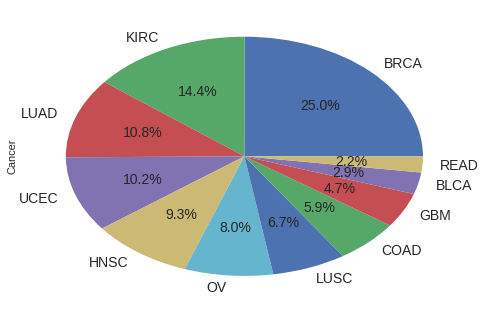

In [16]:
freq_cancer_types = geneexpression_data_sorted["Cancer"].value_counts()
print(freq_cancer_types)
freq_cancer_types.plot.pie(fontsize=14, autopct='%1.1f%%')
#pie_plot

## 5. Parsing Data with Pandas

Often times we only need a subset of the data and need to create a new dataframe from the existing data.

Since this file contains information for 12 different cancers types we can subset the cancers we want to focus on using:

* Select patient samples (rows) which have Lung Adendocarcinoma (LUAD): 253 patient samples
    * **.loc function** : selects data based on a label

In [17]:
LUAD = geneexpression_data_sorted.loc[geneexpression_data_sorted['Cancer'].isin(['LUAD'])]
print(LUAD.shape)
LUAD

(353, 20502)


,Cancer,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
TCGA-J2-8194,LUAD,136.266907,0.000000,0.000000,91.273399,0.436100,23738.701172,211.513306,0.872200,0.0000,...,118.621902,55.386002,699.084229,1045.355347,20.497200,870.039185,2172.263428,1238.988159,887.483582,316.615814
TCGA-55-7284,LUAD,51.399700,127.782402,0.000000,128.502304,1.558300,43226.847656,336.909210,278.316315,4.3633,...,204.451797,112.510803,986.729309,1205.206055,0.000000,803.782410,5048.650879,2229.646729,717.763000,26.491501
TCGA-95-7947,LUAD,27.194799,0.305600,0.305600,210.132294,953.757629,14083.240234,695.225403,0.611200,0.0000,...,1228.486206,67.536201,366.406708,1698.183594,318.428497,1007.541992,3483.155762,1160.033203,850.466919,6.417500
TCGA-95-7948,LUAD,47.697399,0.000000,0.657900,30.226999,12.171100,7085.723633,130.592102,0.657900,0.0000,...,260.197388,217.434204,543.092102,1217.763184,5.921100,907.894714,2845.065918,681.907898,669.078918,2.631600
TCGA-95-8039,LUAD,49.325600,0.000000,0.385400,84.003899,1.156100,30022.617188,163.776505,1.156100,1.1561,...,475.915192,29.287100,274.759186,1226.974976,45.472099,902.504822,3420.038574,875.144470,668.593384,19.267799
TCGA-97-7546,LUAD,69.311096,0.000000,6.263000,119.290199,3.131500,80995.242188,246.346603,1.565800,0.0000,...,181.106506,76.722298,509.394592,1575.678467,5.741100,1480.688843,4320.459473,1406.576172,802.713989,36.534401
TCGA-97-7547,LUAD,57.730598,0.000000,150.125793,102.160004,625.451416,44708.546875,1817.704346,0.875400,0.0000,...,77.032501,78.783203,437.247009,1541.963013,1.750700,1059.634521,1924.499390,1953.386597,567.677002,20.571199
TCGA-97-7552,LUAD,53.595200,41.388000,0.000000,106.041702,22.786699,57291.703125,228.796799,21.391600,1.8601,...,222.286301,84.636200,578.037415,1084.924561,2.325200,879.379517,4508.505371,1707.605225,824.970520,42.783100
TCGA-97-7553,LUAD,34.377899,0.892900,0.000000,94.311501,0.892900,71169.718750,332.170685,6.250500,0.0000,...,663.001892,50.450699,362.976807,1055.445557,29.913200,1165.722656,5610.291016,1717.108032,821.050903,79.470901
TCGA-97-7554,LUAD,178.284103,0.500300,0.000000,75.637802,0.500300,35180.074219,402.201111,1.000500,0.0000,...,518.259094,52.026001,532.766418,791.395691,127.563797,930.965515,4223.111816,880.940491,580.790405,14.007000


### Exercise 2

Write a code that can parse both LUAD and LUSC simultaneously 

**Hint:** Use the same code as above, but add LUSC



In [18]:
LUAD_LUSC = 
print(LUAD_LUSC.shape)
LUAD_LUSC

SyntaxError: invalid syntax (<ipython-input-18-eb69a462d309>, line 1)

##  6. Write the Data to a File

Exporting Pandas dataframes to multiple different file types with ease
[``Alternative Formats``](https://pandas-docs.github.io/pandas-docs-travis/io.html)

* .to_csv
* .to_excel
* .to_sql
* .to_html
* .to_stata

Here, we will export to a comma seperated file (.csv)


In [19]:
out_file_path= os.path.join(DATADIR2,"LUAD.csv")
LUAD.to_csv(out_file_path, sep= "\t")

 ## 6. Perform Basic Statistics with Pandas
 
 ### **The .describe( ) function** 
 * computes a variety of summary statistics on the columns of the data frame

In [20]:
first_100_genes = LUAD.ix[:,0:100]
stats = first_100_genes.describe()
stats

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ABHD2,ABHD3,ABHD4,ABHD5,ABHD6,ABHD8,ABI1,ABI2,ABI3BP,ABI3
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,150.181271,6.499632,13.026561,109.163033,125.292552,24210.923341,402.442294,4.913420,0.625716,657.277867,...,6487.029643,643.047073,1174.246207,665.926038,166.618748,297.019699,1652.949307,1064.973062,502.898490,302.495730
std,266.836337,42.528091,55.583204,50.283571,1567.824474,20731.330602,351.139465,33.309399,2.192499,232.898685,...,6673.377485,437.103226,629.142444,231.354604,83.775531,122.269797,453.285841,415.669137,495.050827,186.154886
min,2.396600,0.000000,0.000000,16.591900,0.000000,1953.936523,23.109200,0.000000,0.000000,232.831894,...,787.524414,120.296303,306.002899,227.598602,32.855400,23.046101,716.965393,151.228699,6.168600,28.673800
25%,42.071098,0.000000,0.000000,74.993401,0.000000,10725.820312,190.972198,0.324900,0.000000,510.584106,...,3307.192383,405.607086,791.527283,498.051514,114.187302,218.556702,1340.959961,808.457275,157.725296,173.896500
50%,80.764503,0.000000,0.000000,99.170197,1.109900,18985.478516,317.339813,0.879100,0.000000,608.311218,...,4848.990234,531.144775,1015.977417,637.518677,152.504807,276.689789,1572.530273,1015.714294,372.398804,263.606293
75%,161.156601,0.000000,0.936500,135.498703,4.340700,29576.404297,498.204712,1.895100,0.357400,735.350098,...,7039.890137,726.297485,1396.878540,782.764221,196.351898,355.589386,1901.998169,1263.687866,659.407715,376.424805
max,3840.155518,692.094299,435.765686,364.070404,28749.859375,168906.859375,2724.301514,512.119995,25.266399,2130.404785,...,78641.593750,3633.509277,4658.157715,1723.340454,632.679688,945.775818,3814.414307,5147.004395,3490.022705,1162.816528


## 7. Normalizing the Data

### We do we Need to Log the Gene Expression Data

* As seen, the range of values for each gene is very large and not of the same magnitute
* Logging gene expression data normalizes that data
* Creates a normal distribution nessecary for particular statistical tests
* Samller numbers are better for graphing
* [``Tips for analyzing gene expression data``](https://www.biogazelle.com/seven-tips-bio-statistical-analysis-gene-expression-data)

### Create a Histogram of Data Before Logging 
* A **Histogram** is a graphical representation of the distribution of numerical data

* y-axis = frequency 
* x-axis = gene expression values
* Left Skewed Distribution

### EGFR 
* EGFR is a cell surface protein that binds to epidermal growth factor and induces cell proliferation. Overexpression of EGFR can lead to cancer


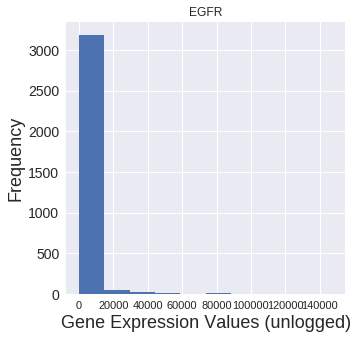

In [21]:
EGFR = geneexpression_data_sorted[['EGFR']]
EGFR.hist(sharey=True, figsize= (5,5), xlabelsize=11, ylabelsize=14)
plt.xlabel("Gene Expression Values (unlogged)",fontsize= 18 )
plt.ylabel("Frequency",fontsize= 18 )

### We will log the data with the **.log**  function

We will only log coulmns 1:20502 because column 0 is the Cancer Type, and you cannot do math on strings. 

But, why are we getting Infinity?? 

In [22]:
gene_expression_log = np.log(geneexpression_data.transpose())
gene_expression_log.head()

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


#probe,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
TCGA-02-0047,4.828369,-inf,5.499745,4.008649,3.717987,10.434481,3.590831,0.206445,0.206445,6.145295,...,6.002498,4.176732,5.876321,7.011055,-0.486784,7.096031,8.260486,7.242149,6.402884,1.911186
TCGA-02-0055,5.970761,-inf,4.922540,4.430983,0.519924,10.666074,6.189775,-0.578748,-inf,6.388249,...,5.503501,3.752016,5.635890,6.409695,1.618517,6.829206,9.348486,6.406924,6.576678,2.512327
TCGA-02-2483,5.605259,-inf,4.709791,3.542037,0.929404,9.955060,4.465514,-inf,-inf,7.003593,...,6.505977,2.966278,6.006652,6.764208,3.791599,7.097263,8.530466,6.723934,6.558815,5.988823
TCGA-02-2485,4.430137,-inf,5.549632,4.838547,5.353887,8.961691,5.044960,-0.741917,-inf,6.921470,...,6.091094,3.985450,5.614170,7.204680,-inf,6.975414,8.535220,7.038366,6.551760,2.754571
TCGA-02-2486,4.684500,-inf,1.451216,5.249812,4.641102,10.620630,3.781969,-inf,-0.494624,6.553690,...,4.309324,3.456547,5.289129,6.480718,-inf,6.536161,8.961879,6.441646,6.268033,4.241502


## Exercise 2 

Add another line of code, that does not return infinity

**Hint**:
* What creates an infinite log?
* You will need to perfom some simple math on the **gene_expression_log_math** code before logging it


In [23]:
gene_expression_log_math = geneexpression_data.transpose()
gene_expression_log = np.log(gene_expression_log_math)
gene_expression_log.head()

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


#probe,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
TCGA-02-0047,4.828369,-inf,5.499745,4.008649,3.717987,10.434481,3.590831,0.206445,0.206445,6.145295,...,6.002498,4.176732,5.876321,7.011055,-0.486784,7.096031,8.260486,7.242149,6.402884,1.911186
TCGA-02-0055,5.970761,-inf,4.922540,4.430983,0.519924,10.666074,6.189775,-0.578748,-inf,6.388249,...,5.503501,3.752016,5.635890,6.409695,1.618517,6.829206,9.348486,6.406924,6.576678,2.512327
TCGA-02-2483,5.605259,-inf,4.709791,3.542037,0.929404,9.955060,4.465514,-inf,-inf,7.003593,...,6.505977,2.966278,6.006652,6.764208,3.791599,7.097263,8.530466,6.723934,6.558815,5.988823
TCGA-02-2485,4.430137,-inf,5.549632,4.838547,5.353887,8.961691,5.044960,-0.741917,-inf,6.921470,...,6.091094,3.985450,5.614170,7.204680,-inf,6.975414,8.535220,7.038366,6.551760,2.754571
TCGA-02-2486,4.684500,-inf,1.451216,5.249812,4.641102,10.620630,3.781969,-inf,-0.494624,6.553690,...,4.309324,3.456547,5.289129,6.480718,-inf,6.536161,8.961879,6.441646,6.268033,4.241502


### Remerge with Meta Data

* we have to remove it when logging

In [24]:
gene_expression_log_meta= cancer_type_data.merge(gene_expression_log, left_index=True, right_index=True)
gene_expression_log_meta.head()

,Cancer,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
TCGA-02-0047,GBM,4.828369,-inf,5.499745,4.008649,3.717987,10.434481,3.590831,0.206445,0.206445,...,6.002498,4.176732,5.876321,7.011055,-0.486784,7.096031,8.260486,7.242149,6.402884,1.911186
TCGA-02-0055,GBM,5.970761,-inf,4.922540,4.430983,0.519924,10.666074,6.189775,-0.578748,-inf,...,5.503501,3.752016,5.635890,6.409695,1.618517,6.829206,9.348486,6.406924,6.576678,2.512327
TCGA-02-2483,GBM,5.605259,-inf,4.709791,3.542037,0.929404,9.955060,4.465514,-inf,-inf,...,6.505977,2.966278,6.006652,6.764208,3.791599,7.097263,8.530466,6.723934,6.558815,5.988823
TCGA-02-2485,GBM,4.430137,-inf,5.549632,4.838547,5.353887,8.961691,5.044960,-0.741917,-inf,...,6.091094,3.985450,5.614170,7.204680,-inf,6.975414,8.535220,7.038366,6.551760,2.754571
TCGA-02-2486,GBM,4.684500,-inf,1.451216,5.249812,4.641102,10.620630,3.781969,-inf,-0.494624,...,4.309324,3.456547,5.289129,6.480718,-inf,6.536161,8.961879,6.441646,6.268033,4.241502


### The Logged Data is Distribtuted More Evenly

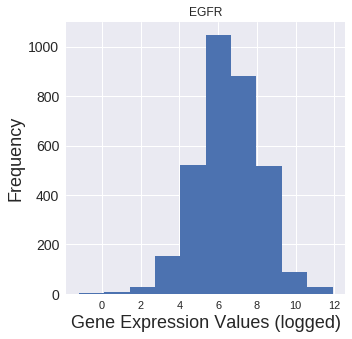

In [25]:
EGFR_log = gene_expression_log_meta[['Cancer', 'EGFR']]
EGFR_log.hist(sharey=True, figsize= (5,5), xlabelsize=11, ylabelsize=14)
plt.xlabel("Gene Expression Values (logged)",fontsize= 18 )
plt.ylabel("Frequency",fontsize= 18 )

## 8. More on Plotting 

### Create a Basic Plot of EGFR Expression Across All Patients

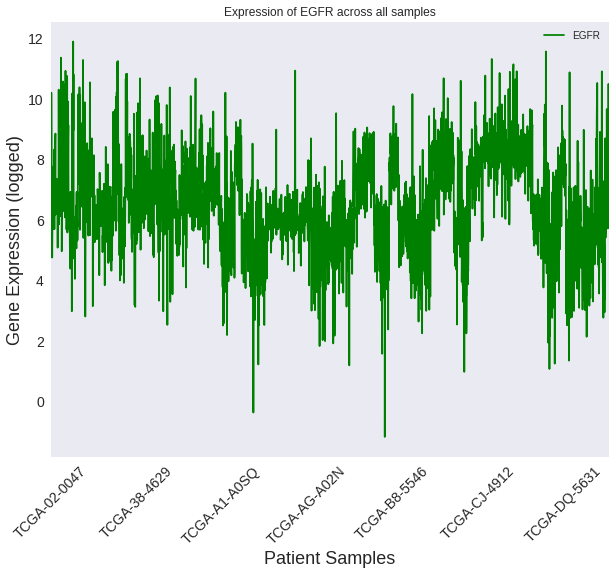

In [26]:
basic_plot = EGFR_log.plot(rot=45, title='Expression of EGFR across all samples', grid = False, fontsize= 14,color='g', figsize= (10,8))
basic_plot.set_xlabel("Patient Samples",fontsize= 18 )
basic_plot.set_ylabel("Gene Expression (logged)", fontsize= 18)

### Exercise 3

Plot an interesting region of the data, any region is fine

**Hint**:
* Make a new variable of the subset data, and plot it
* subset with the .xi function

In [27]:
subset= 
basic_plot = subset.plot(rot=45, title='Expression of EGFR across all samples', grid = False, fontsize= 14,color='g', figsize= (10,8))
basic_plot.set_xlabel("Patient Samples",fontsize= 18 )
basic_plot.set_ylabel("Gene Expression (logged)", fontsize= 18)



SyntaxError: invalid syntax (<ipython-input-27-2d672bbf0b25>, line 1)

## Create a Boxplot for EGFR Gene Expression Across all Cancer Types

* Now that we have a normal distribution we can compare data points
* Do particular cancers have higher EGFR expression than others? 


### Create the boxplot 

* Glioblastoma(GBM) has the highest EGFR expression which in well-known


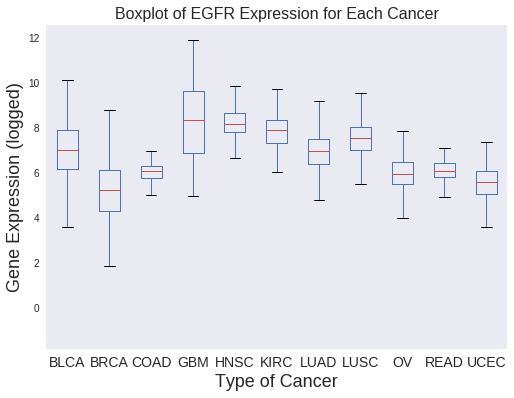

In [28]:
EGFR_log.boxplot(by="Cancer", fontsize=14, grid=False,figsize= (8,6) )
plt.title("Boxplot of EGFR Expression for Each Cancer", fontsize = 16 )
plt.suptitle("")
plt.xlabel("Type of Cancer",fontsize= 18 )
plt.ylabel("Gene Expression (logged)", fontsize= 18) 

## 9. Making a Heatmap using the Seaborn Library

Above we imported the **Seaborn** library as sns
* We will use to to make a **HeatMap** which is graphical representation of data where the individual values contained in a DataFrame are represented as colors. 
* First we subset the samples with "BRCA" cancer
* Then we make a basic Heatmap and label it

### Exercise 4

Pull out the breast cancer samples only

**Hints**
* Modify the code we used to parse the LUAD cancers
* make sure to parse from the logged data (gene_expression_log_meta)

In [29]:
BRCA = 
BRCA.head()

SyntaxError: invalid syntax (<ipython-input-29-5c79ad94f308>, line 1)

### Make the HeatMap

In [30]:
BRCA_short = BRCA.ix[0:30,1:30]

sns.heatmap(BRCA_short, linewidths=.5, annot=False)
plt.title("Heat Map for Gene Expression in Breast Cancer ", fontsize = 16)
plt.xlabel("Genes",fontsize= 18 )
plt.ylabel("Breast Cancer Patient Samples", fontsize= 18) 


NameError: name 'BRCA' is not defined

## Cluster the Heatmap to Find Patterns

* using the **cluster map** Seaborn function to add dendrograms
* hierarchical clustering arranging data in a hierarchy based on the distance or similarity between them so discover patterns 

In [31]:
sns.clustermap(BRCA_short, yticklabels=False, cmap="RdBu_r", linewidths=.5, figsize=(12, 10))
 

NameError: name 'BRCA_short' is not defined

## 10. Making Correlation Heatmaps

* Often times we need to determine how similar or differnt two datasets are 
* **.corr() function** calculations the correlation of all samples in a dataframe
* Different techniques (Spearman & Pearson) based on data distribution

#### Here we are correlating the gene expression values for 30 genes with eachother to see if any patterns emerge
* **Red** = highly correlated; **1** = perfect correlation 
* **Blue** = highly negatively correlated; **- value** = negatively correlated
* **white** = no correlation; **0** = no correlation

In [32]:
BRCA_corrs = BRCA_short.corr( method='spearman')
sns.clustermap(BRCA_corrs, vmax=0.8, square=True, yticklabels=False)


NameError: name 'BRCA_short' is not defined

### Question??? 